In [2]:
import requests 
from bs4 import BeautifulSoup as bs
import re


In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [4]:
#creating an empty review list
redmi_reviews = []
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/Redmi-Pro-Blue-64GB-Storage/product-reviews/B07DJHR5DY/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    redmi_reviews = redmi_reviews+ip

In [5]:
##Writing reviews in a text file
with open("redmi.txt","w",encoding = 'utf-8') as output:
    output.write(str(redmi_reviews))

In [21]:
redmi_reviews

["\n\n  Don't buy this MI 6 Pro ,Speaker volume is very bad & LowCamera pics are not good at all special back cam having dual cam stabilization problem front cam like VGA picsHeating issueBattrey drained very Fast\n\n",
 '\n\n  Cheap Chinese product.Negatives:1. Mobile network signal reception is very weak and says service unavailable.2. Slow charging3. Overheating4. Internet speed too slow5. Display width is too small( Feels like 5" display)6. Cameras don\'t have clarity7. 4g signal is weak8. Mentioned made in India but says frequently used apps as alipay, qq, etc., which are Chinese apps9. Tried to get replacement using smartchk app but it responds like a Chinese electronic voting machine(Votes for Redmi:Says mobile works well)10. So no replacements if mobile has quality issues!!!!Worth only half the price .ie. ₹4500/- only, since we have to get adjusted to low quality...\n\n',
 "\n\n  I got this product and face below issue in 4 days.1) Couple of times the Phone gives a ECHO to the 

In [6]:
import os
os.getcwd()


'C:\\Users\\ASUS'

In [7]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(redmi_reviews)


In [8]:
red_rev_string

'\n\n  Don\'t buy this MI 6 Pro ,Speaker volume is very bad & LowCamera pics are not good at all special back cam having dual cam stabilization problem front cam like VGA picsHeating issueBattrey drained very Fast\n\n \n\n  Cheap Chinese product.Negatives:1. Mobile network signal reception is very weak and says service unavailable.2. Slow charging3. Overheating4. Internet speed too slow5. Display width is too small( Feels like 5" display)6. Cameras don\'t have clarity7. 4g signal is weak8. Mentioned made in India but says frequently used apps as alipay, qq, etc., which are Chinese apps9. Tried to get replacement using smartchk app but it responds like a Chinese electronic voting machine(Votes for Redmi:Says mobile works well)10. So no replacements if mobile has quality issues!!!!Worth only half the price .ie. ₹4500/- only, since we have to get adjusted to low quality...\n\n \n\n  I got this product and face below issue in 4 days.1) Couple of times the Phone gives a ECHO to the Listener

In [9]:
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)


In [10]:
#Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")


In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]


In [13]:
# Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)


In [14]:

# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


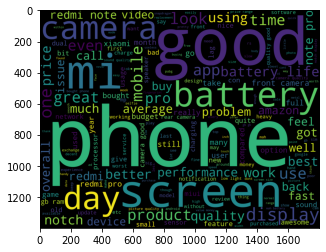

In [15]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

plt.imshow(wordcloud_ip)


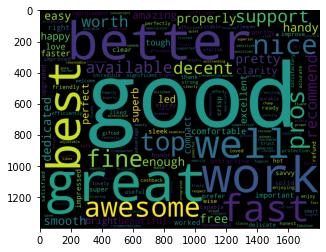

In [17]:
#Importing postive words
with open ("D:/DATA SCIENCE/1. Data Scientist/Assignment/10. text mining/positive-words.txt","r")as pos:
    poswords = pos.read().split("\n")
    poswords =poswords[10:]
pos_words = ' '.join([w for w in red_rev_words if w in poswords])
cloud_pos = WordCloud(background_color = 'black',width =1800,height =1400).generate(pos_words)
plt.imshow(cloud_pos)

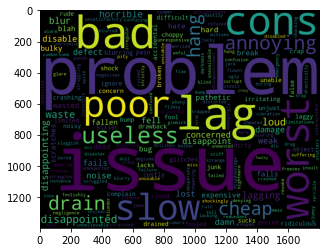

In [16]:
#Importing negative words
with open ("D:/DATA SCIENCE/1. Data Scientist/Assignment/10. text mining/negative-words.txt","r")as nos:
    negwords = nos.read().split("\n")
    negwords =negwords[10:]
neg_words = ' '.join([w for w in red_rev_words if w in negwords])
cloud_neg = WordCloud(background_color = 'black',width =1800,height =1400).generate(neg_words)
plt.imshow(cloud_neg)

In [20]:
#Perform Sentiment Analysis on Tweets
from textblob import TextBlob
analysis = TextBlob(red_rev_string)
print(analysis.sentiment)
print("")

Sentiment(polarity=0.22422302920345655, subjectivity=0.5063475144085797)

